# Linked Data con Python

Usaremos:

* gastrodon: Toolkit to display, analyze, and visualize data and documents based on RDF graphs and the SPARQL query language using Pandas, Jupyter, and other Python ecosystem tools. https://github.com/paulhoule/gastrodon
* sys
* pandas 

<div class="alert alert-warning" role="alert" style="margin: 10px">
Para instalar la librería:<br>
jovyan@9778f76bfaea:~$ /opt/conda/bin/pip install gastrodon
</div>

## Cargamos el entorno

In [8]:
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from IPython.display import display, HTML
pd.options.display.width=120
pd.options.display.max_colwidth=100

Definimos los prefijos que de los "namespace" a utilizar

In [9]:
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbp: <http://dbpedia.org/ontology/> .
    @prefix pr: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
""").graph

Y el endpoint sobre el que vamos a hacer las consultas. En este caso, dbpedia.

In [10]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

## Tripletas en DBpedia

Con una consulta simple, podemos contar el número de tripletas

In [11]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

438336346

## Número de predicados

Para la siguiente consulta, hacemos una lista de predicados comunes. El número de respuestas en el endpoint de DBPEDIA está limitado a 10000.

Each predicate is a relationship between a topic and either another topic or a literal value.  For instance,  the **rdf:type** predicate links a topic to another topic representing a class that the first topic is an instance,  for instance:

```
<Alan_Alda> rdf:type on:Person .
```

**rdfs:label**,  on the other hand,  links topics to literal values,  such as

```
<Alan_Alda> rdfs:label 
                "Alan Alda"@en,
                "アラン・アルダ"@ja . 
```

Strings in RDF (like the one above) are unusual compared to other computer languages because they can contain language tags,  a particularly helpful feature for multilingual databases such as DBpedia.

In [12]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
rdf:type,113715836
http://www.w3.org/2002/07/owl#sameAs,33623686
http://purl.org/dc/terms/subject,23990492
rdfs:label,22430849
http://www.w3.org/ns/prov#wasDerivedFrom,15801282
dbp:wikiPageID,15797808
dbp:wikiPageRevisionID,15797808
http://purl.org/dc/elements/1.1/language,12845235
foaf:primaryTopic,12845232


Podemos enseñar solo los N primeros resultados

In [7]:
predicates.head(30)

,count
p,
rdf:type,113715861
http://www.w3.org/2002/07/owl#sameAs,33623690
http://purl.org/dc/terms/subject,23990497
rdfs:label,22430850
http://www.w3.org/ns/prov#wasDerivedFrom,15801283
dbp:wikiPageID,15797809
dbp:wikiPageRevisionID,15797809
http://purl.org/dc/elements/1.1/language,12845235
foaf:primaryTopic,12845233


O los últimos

In [8]:
predicates.tail()

,count
p,
pr:buschCarTeam,135
pr:majorsites,135
ns1:v4b,135
ns10:a,135
pr:seats1Last,134


## Visualización de resultados

**dbp:Image** Algunos resultados de dbpedia son links a imagenes, que gracias a Jupyter, podemos visualizarlos

In [13]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,483605


In [15]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { ?s a ?type .} GROUP BY ?type ORDER BY DESC(?count)
""")
types[types.index.str.startswith('dbp:')]

,count
type,
dbp:Image,2897004
dbp:Person,1818071
dbp:Agent,1546261
dbp:TimePeriod,1127706
dbp:CareerStation,977023
dbp:Place,881597
dbp:Location,839987
dbp:Settlement,581293
dbp:PopulatedPlace,516747


In [24]:
pics = endpoint.select("""
    SELECT ?that { 
        ?that a dbp:Image
    } LIMIT 10
""")
pics

,that
0,http://en.wikipedia.org/wiki/Special:FilePath/Alfred_Schütz.jpg
1,http://en.wikipedia.org/wiki/Special:FilePath/Aromas.JPG
2,http://en.wikipedia.org/wiki/Special:FilePath/Baldwin_Park_CA_logo.jpg
3,"http://en.wikipedia.org/wiki/Special:FilePath/Bayfield,CO.jpg"
4,http://en.wikipedia.org/wiki/Special:FilePath/Bennettcoskyline.JPG
5,http://en.wikipedia.org/wiki/Special:FilePath/Bitterspring.jpg
6,http://en.wikipedia.org/wiki/Special:FilePath/Boulder_Creek.jpg
7,http://en.wikipedia.org/wiki/Special:FilePath/BrandonFL.gif
8,http://en.wikipedia.org/wiki/Special:FilePath/Buttonwillow.jpg
9,http://en.wikipedia.org/wiki/Special:FilePath/CarberryBookplate.jpg


In [26]:
HTML('<img src="{0}">'.format(pics.at[9,'that']))

## Ejercicio 1

Muestra la imagen de un escritor/a vivo

In [27]:
escritores = endpoint.select("""
SELECT ?nombre ?foto
WHERE{
    ?autor a dbp:Writer .
    ?autor foaf:name ?nombre .
    ?autor dbp:birthDate ?fechaNac .
    ?autor foaf:depiction ?foto
    FILTER NOT EXISTS { ?autor dbo:deathDate ?death. }
} 
LIMIT 100



""")
escritores

,nombre,foto
0,Alice Walker,http://commons.wikimedia.org/wiki/Special:FilePath/Alice_Walker.jpg
1,Alice Walker,http://commons.wikimedia.org/wiki/Special:FilePath/Alice_Walker.jpg
2,Amy Tan,http://commons.wikimedia.org/wiki/Special:FilePath/Amy_Tan.jpg
3,Amy Tan,http://commons.wikimedia.org/wiki/Special:FilePath/Amy_Tan.jpg
4,Eric Corley,http://commons.wikimedia.org/wiki/Special:FilePath/Emmanuel_Goldstein_Chaos_Communication_Camp_2...
5,Greg Bear,http://commons.wikimedia.org/wiki/Special:FilePath/Greg_Bear.jpg
6,Greg Bear,http://commons.wikimedia.org/wiki/Special:FilePath/Greg_Bear.jpg
7,Gregory Benford,http://commons.wikimedia.org/wiki/Special:FilePath/GB_UTOPIALES_2008.jpg
8,Gregory Benford,http://commons.wikimedia.org/wiki/Special:FilePath/GB_UTOPIALES_2008.jpg
9,Harry Turtledove,http://commons.wikimedia.org/wiki/Special:FilePath/Harry_Turtledove_2005.jpg


In [29]:
HTML('<img src="{0}">'.format(escritores.at[99,'foto']))

Los datos se pueden recoger en distintos tipos de estructuras para mostrarlos en gráficos. Veamos un ejemplo de un diagrama de barras.

In [30]:
places = endpoint.select("""
SELECT ?city ?population
WHERE{
    ?city a dbp:PopulatedPlace .
    ?city dbp:populationTotal ?population
    FILTER (?population > 1000000)
} 
ORDER BY ASC(?population)
LIMIT 100
""")

In [31]:
places.head(10)

,city,population
0,<Padang>,1000096
1,<Latifabad_Taluka>,1000761
2,<Opole_Voivodeship>,1000858
3,"<Kota,_Rajasthan>",1001694
4,<Tulungagung_Regency>,1002807
5,"<St._Louis_County,_Missouri>",1003362
6,<Cesar_Department>,1004064
7,<Rukwa_Region>,1004539
8,<Zaoyang>,1004741
9,<Metropolitan_City_of_Bologna>,1005831


0                          <Padang>
1                <Latifabad_Taluka>
2               <Opole_Voivodeship>
3                 <Kota,_Rajasthan>
4             <Tulungagung_Regency>
5      <St._Louis_County,_Missouri>
6                <Cesar_Department>
7                    <Rukwa_Region>
8                         <Zaoyang>
9    <Metropolitan_City_of_Bologna>
Name: city, dtype: object

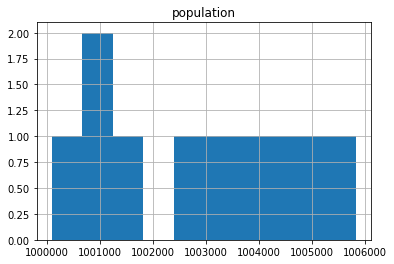

In [32]:
places.head(10).hist()
places.head(10)['city']

# Ejercicios de consultas

<div class="alert alert-warning" role="alert" style="margin: 10px">
La librería a veces tiene problemas con las fechas. Si es así, colocal la consulta en el endpoint directamente para comprobar que si el problema está en la consulta o en el paquete.
</div>

1. Obtener la masa de 10 estrellas

2. Constelación a la que pertenece cada estrella 

3. Distancia a la que está la estrella Kepler-19 

4. Estrellas pertenecientes a la constelación Centaurus 

5. Obtener la población total de Londres 

6. Gente que nació en Londres antes de 1900 

7. Nombre y fechas de nacimiento y de muerte de toda la gente nacida en Londres entre 1900 y 1950. 

8. Nombre y fecha de nacimiento de los actores nacidos en Londres después de 1930 que siguen vivos.

9. Fotos de 10 de los actores nacidos en Londres después de 1930 que siguen vivos.

10 . Histograma de las 10 peliculas más largas